In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.svm import SVR

In [215]:
data = pd.read_csv('./data/Bengaluru_House_Data.csv')

In [216]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [217]:
data.shape

(13320, 9)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [219]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

We can see that there are lot of missing values in society column followed by balcony, bath,size and location. So, we can drop the society column as it has a lot of missing values and also we can drop the avalilability column as it is of no use

In [220]:
data.drop(['availability','society'],axis=1,inplace=True)

In [221]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [222]:
data.location.value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

Since the most of the houses are located in Whitefield, we can impute the missing value of location with whitefield

In [223]:
data['location'] = data['location'].fillna('Whitefield')

In [224]:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

As previously done, For bedrooms also, we are using mode for imputation on the missing values.

In [225]:
data['size'] = data['size'].fillna('2 BHK')

In [226]:
data.bath.value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

Here also, we use mode imputation


In [227]:
data.bath = data.bath.fillna(2.0)

In [228]:
data.balcony.value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [229]:
data.balcony = data.balcony.fillna('2.0')

In [230]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


we can see that in size feature, there are two types filled. One is with BHK and another is Bedroom. But 2BHK and 2 Bedroom means the same. So, we create a new column with only number of bedrooms called Bedrooms.

In [231]:
data['bedrooms'] = data['size'].str.split().str.get(0).astype(int)

In [232]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [233]:
data.drop('size',axis=1,inplace=True)

In [234]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


Here we are exploring the total_sqft feature

In [235]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

data[~data["total_sqft"].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


From the above we can see that total_sqft can be a range 3090-5002. For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. So, we are going to just drop such corner cases to keep things simple.

In [236]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [237]:
data = data.copy()
data["total_sqft"] = data["total_sqft"].apply(convert_sqft_to_number)
data.head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,2732.0,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,1020.0,6.0,2.0,370.00,6


We are adding a new column called Price per square feet for ease of calculation

In [238]:
data = data.copy()
data["price_per_sqft"] = data["price"]*100000/data["total_sqft"]
data.head()

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


Here, we are exploring the location feature

In [239]:
data['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [240]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()
location_count_less_10 = location_count[location_count<10]
location_count_less_10

location
Vishwanatha Nagenahalli           9
Chennammana Kere                  9
2nd Phase JP Nagar                9
Jakkur Plantation                 9
B Narayanapura                    9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: count, Length: 1040, dtype: int64

In [241]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
len(data.location.unique())

255

In [242]:
data['location'].value_counts()

location
other                  2755
Whitefield              542
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: count, Length: 255, dtype: int64

In [243]:
data[data.total_sqft/data.bedrooms<300].head()

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
9,Plot Area,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000


Here, the price per sqft ranges from 267 to 12000000. This is a very wode spread of data.So there maybe some outliers present in this, and we should remove it if there is any.

In [244]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [245]:
df = remove_pps_outliers(data)
df.shape

(11449, 8)

In [246]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,10416.666667
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
4,Plot Area,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,9139.784946


In [247]:
df.tail()

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
11444,Plot Area,other,812.0,1.0,0.0,26.00,1,3201.970443
11445,Super built-up Area,other,1440.0,2.0,2.0,63.93,3,4439.583333
11446,Super built-up Area,other,1075.0,2.0,2.0,48.00,2,4465.116279
11447,Plot Area,other,1200.0,5.0,2.0,325.00,4,27083.333333
11448,Super built-up Area,other,3600.0,5.0,2.0,400.00,4,11111.111111


Here, we are removing some more data. Because, normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft.) For example if we have 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [248]:
df = df[~(df.total_sqft/df.bedrooms<300)]
df.shape

(10998, 8)

<Axes: xlabel='count', ylabel='bath'>

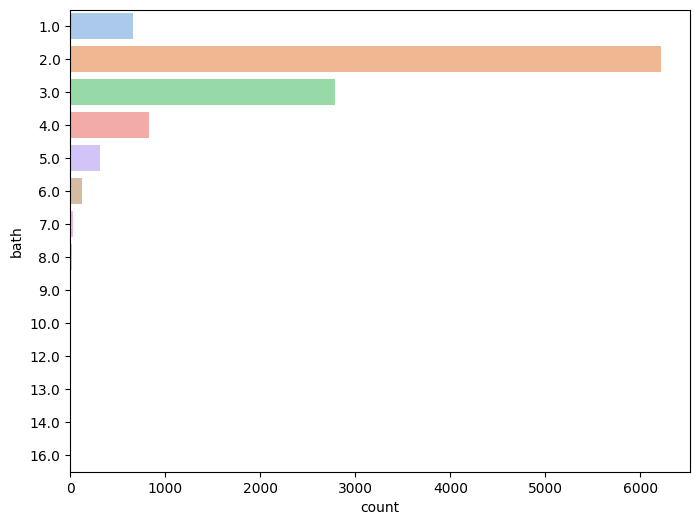

In [249]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,y='bath',palette = 'pastel')

<Axes: xlabel='count', ylabel='bedrooms'>

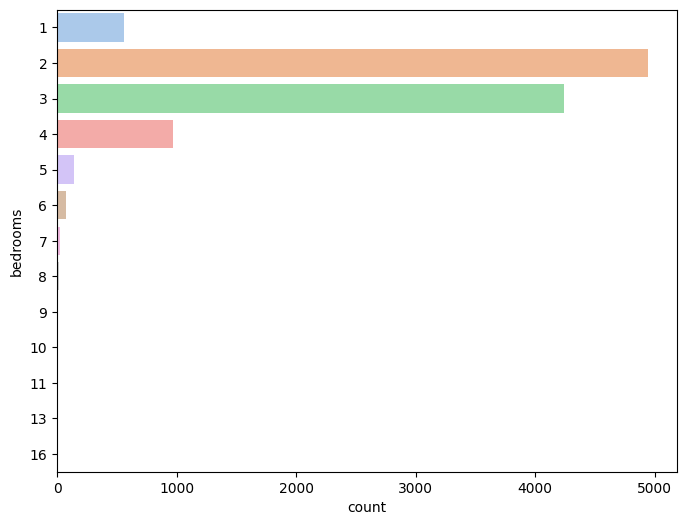

In [250]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,y='bedrooms',palette = 'pastel')

<Figure size 800x600 with 0 Axes>

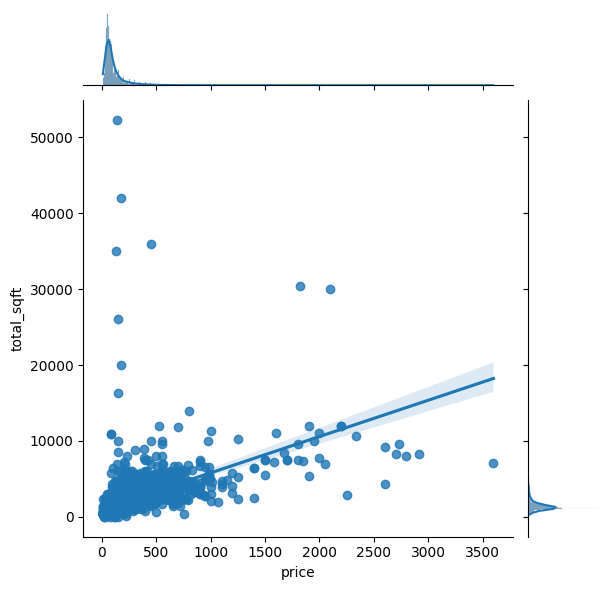

In [251]:
plt.figure(figsize=(8, 6))
sns.jointplot(data=data,y='total_sqft',x='price',kind='reg')

<Axes: xlabel='area_type'>

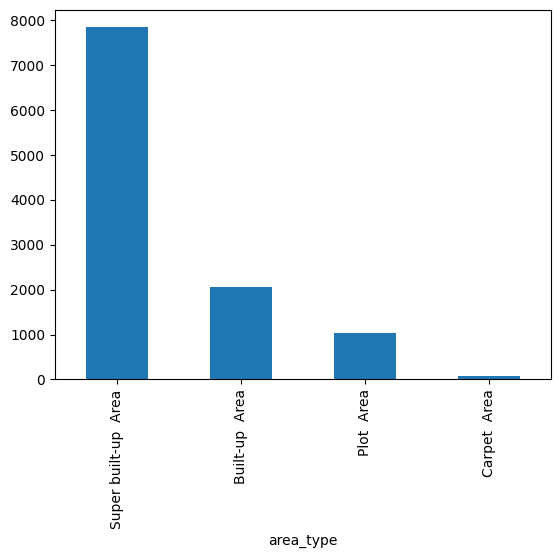

In [252]:
df.area_type.value_counts().plot(kind='bar')

<Axes: xlabel='balcony', ylabel='count'>

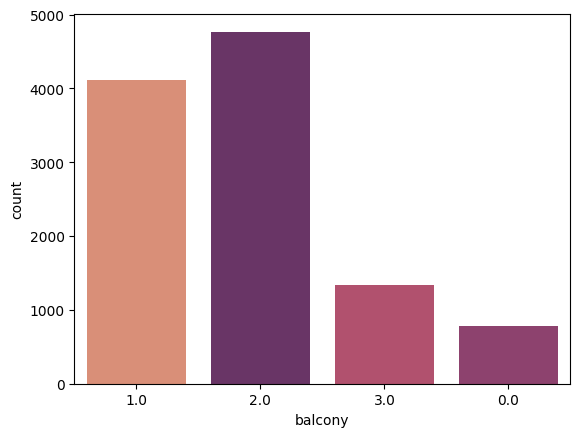

In [253]:
sns.countplot(x = 'balcony', data = df, palette='flare')

In [254]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
6,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
7,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [273]:
svr = SVR()

In [293]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
6,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
7,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [294]:
df_onehot = pd.get_dummies(df['location'])
df_onehot

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11445,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [296]:
df_merge = pd.concat([df,df_onehot.drop('other',axis='columns')],axis='columns') 
df_merge

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860,True,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333,True,False,...,False,False,False,False,False,False,False,False,False,False
6,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,Plot Area,other,812.0,1.0,0.0,26.00,1,3201.970443,False,False,...,False,False,False,False,False,False,False,False,False,False
11445,Super built-up Area,other,1440.0,2.0,2.0,63.93,3,4439.583333,False,False,...,False,False,False,False,False,False,False,False,False,False
11446,Super built-up Area,other,1075.0,2.0,2.0,48.00,2,4465.116279,False,False,...,False,False,False,False,False,False,False,False,False,False
11447,Plot Area,other,1200.0,5.0,2.0,325.00,4,27083.333333,False,False,...,False,False,False,False,False,False,False,False,False,False


In [297]:
df1 = df_merge.drop('location',axis='columns')
df1

,area_type,total_sqft,bath,balcony,price,bedrooms,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,2850.0,4.0,1.0,428.00,4,15017.543860,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,1630.0,3.0,2.0,194.00,3,11901.840491,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,1875.0,2.0,3.0,235.00,3,12533.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Built-up Area,1200.0,2.0,0.0,130.00,3,10833.333333,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Super built-up Area,1235.0,2.0,2.0,148.00,2,11983.805668,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,Plot Area,812.0,1.0,0.0,26.00,1,3201.970443,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11445,Super built-up Area,1440.0,2.0,2.0,63.93,3,4439.583333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11446,Super built-up Area,1075.0,2.0,2.0,48.00,2,4465.116279,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11447,Plot Area,1200.0,5.0,2.0,325.00,4,27083.333333,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [298]:
df1.drop('area_type',axis=1,inplace=True)

In [302]:
X = df1.drop(['price'], axis = 'columns')
Y = df1['price']
print(X.shape)
print(Y.shape)

(10998, 259)
(10998,)


In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)
X_train.shape

(8798, 259)

In [304]:
svr.fit(X_train,y_train)

SVR()

In [306]:
y_pred = svr.predict(X_test)

In [307]:
print('mae = ',mean_absolute_error(Y_test,y_pred))
print('mse = ',mean_squared_error(Y_test,y_pred))
print('r2_score = ',r2_score(Y_test,y_pred))

mae =  58.76877367374202
mse =  22483.514553909572
r2_score =  -0.07376926992849242
